In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data_source = '../Analysis/'
Graphics_folder = '../Documents/'

Wielko = pd.read_csv(f"{data_source}Wielkopolska_ratings.csv",delimiter=';')
Wielko

,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,3,Electrolux,41.0,M,3.0
1,1,7,Electrolux,57.0,M,3.0
2,2,9,Electrolux,NaN,K,4.5
3,3,8,Beko,NaN,M,1.5
4,4,10,Beko,35.0,M,2.5
...,...,...,...,...,...,...
529,529,8,Samsung,39.0,M,1.5
530,530,9,Electrolux,26.0,K,1.5
531,531,6,Beko,43.0,M,2.5
532,532,5,Beko,NaN,M,2.5


**Średnia ocena dla każej marki:**

,Beko,Dyson,Electrolux,Samsung,Tefal
0,2.523256,2.335294,2.569767,2.138889,2.521739


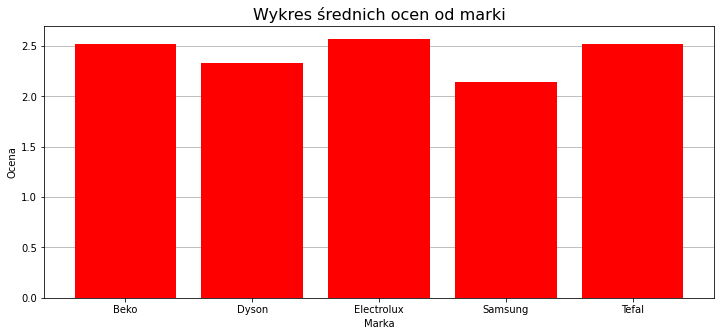

In [24]:
avg_rating = pd.read_csv(f'{data_source}Rating_for_brand.csv',delimiter=';')
avg_rating_list = avg_rating.values.tolist()
bars = avg_rating.columns
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,5))
plt.bar(bars.values,avg_rating_list[0], color = 'red', label = 'Mean rating')
plt.xlabel('Marka')
plt.ylabel('Ocena')
plt.grid(axis = 'y')
plt.title('Wykres średnich ocen od marki', fontsize=16)
plt.savefig(f'{Graphics_folder}Ocena_od_Marki.png')
avg_rating

**Średnia ocena marki w zależności od dnia zwrócenia opinii:**

,Beko,Dyson,Electrolux,Samsung,Tefal
0,NaN,3.500000,NaN,NaN,NaN
1,NaN,1.000000,NaN,NaN,NaN
2,2.875000,2.333333,3.750000,1.500,3.500000
3,2.333333,2.388889,2.772727,2.000,2.800000
4,3.250000,2.250000,2.500000,1.500,2.125000
5,2.269231,2.666667,2.685185,2.750,3.071429
6,2.676471,2.100000,2.400000,2.500,1.875000
7,2.541667,2.700000,2.576923,2.375,2.450000
8,2.425000,2.464286,2.552632,2.250,2.944444
9,2.000000,2.357143,2.687500,1.750,2.700000


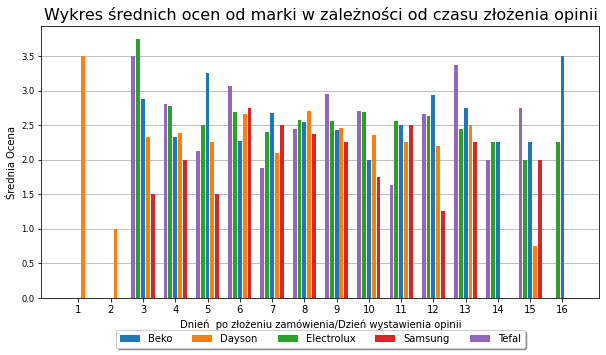

In [66]:
Days = pd.read_csv(f'{data_source}Rating_changes_per_day.csv', delimiter=';')
Days_list = Days.values.tolist()

def Days_hist(values_index: int):
    Mark_days = []
    for i in range(len(Days_list)):
        if not pd.isna(Days_list[i][values_index]):
            Mark_days.append(Days_list[i][values_index])
        else:
            Mark_days.append(0)
    return Mark_days

Beko_days = Days_hist(0)
Dayson_days = Days_hist(1)
Electrolux_days = Days_hist(2)
Samsung_days = Days_hist(3)
Tefal_days = Days_hist(4)

plt.figure(figsize=(10,5))
width = 0.12
plt.rc('axes', axisbelow=True)
bins = np.arange(len(Beko_days))
plt.bar(bins , Beko_days, width, label='Beko')
plt.bar(bins + 1.25*width , Dayson_days, width, label='Dayson')
plt.bar(bins - 1.25*width , Electrolux_days, width, label='Electrolux')
plt.bar(bins + 2.5*width , Samsung_days, width, label='Samsung')
plt.bar(bins - 2.5*width , Tefal_days, width, label='Tefal')
plt.grid(axis = 'y' )
plt.xlabel('Dnień  po złożeniu zamówienia/Dzień wystawienia opinii')
plt.ylabel('Średnia Ocena')
plt.title('Wykres średnich ocen od marki w zależności od czasu złożenia opinii', fontsize=16, )
plt.xticks(bins,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=5, fancybox=True, shadow=True)
plt.savefig(f'{Graphics_folder}Ocena_wedlug_dni.png')
Days

**Średnia ocena marki w zależności od płci:**

[2.3, 2.4444444444444446, 2.8142857142857145, 2.875, 2.5]


,Beko,Dyson,Electrolux,Samsung,Tefal
0,2.300000,2.444444,2.814286,2.875000,2.500000
1,2.513393,2.310811,2.525568,2.066667,2.525862
2,3.000000,2.750000,2.375000,1.750000,NaN


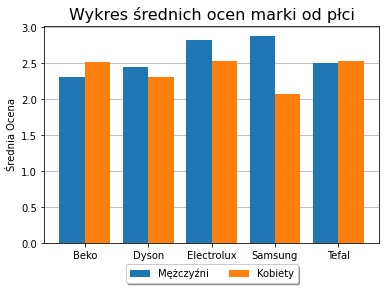

In [29]:
Sex = pd.read_csv(f'{data_source}Mark_rating_to_sex.csv',delimiter=';')
Sex_list = Sex.values.tolist()
width = 0.4
print(Sex_list[0])
bins = np.arange(len(Sex_list[0]))
bars = Sex.columns.values

plt.rc('axes', axisbelow=True)
plt.bar(bins - width/2 , Sex_list[0], width, label='Mężczyźni')
plt.bar(bins + width/2 , Sex_list[1], width, label='Kobiety')
plt.xticks(bins ,bars)
plt.grid(axis = 'y' )
plt.xlabel('Marka')
plt.ylabel('Średnia Ocena')
plt.title('Wykres średnich ocen marki od płci', fontsize=16, )
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.075),
          ncol=2, fancybox=True, shadow=True)
plt.savefig(f'{Graphics_folder}Ocena_od_plci.png')
Sex

**Rozkład wieku recenzentów:**

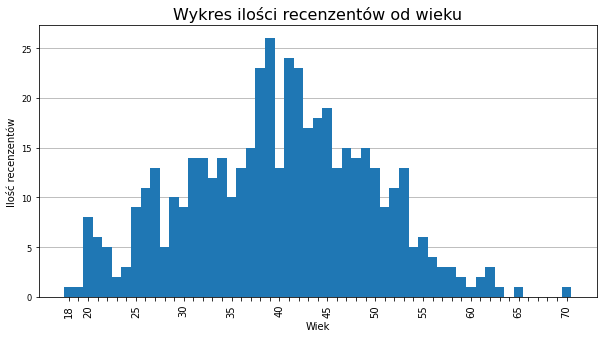

In [62]:
Age = pd.read_csv(f'{data_source}Buyers_age_histogram.csv',delimiter=';')

Age_list = Age.values.tolist()
Col_val = []
for i in range(len(Age.columns.values)):
    Col_val.append(int(float(Age.columns.values[i])))
d = 0
Hist_data = [[],[]]
j = 0
for i in range(Col_val[0], Col_val[-1]+1):
    if i in Col_val:
        if i == 18 or i %5 == 0:
            Hist_data[0].append(Col_val[j-d])
            Hist_data[1].append(Age_list[0][j-d])
        else:
            Hist_data[0].append('')
            Hist_data[1].append(Age_list[0][j-d])
    else:
        d+= 1
        if i == 18 or i %5 == 0:
            Hist_data[0].append(j+Col_val[0])
            Hist_data[1].append(0)
        else:
            Hist_data[0].append('')
            Hist_data[1].append(0)
    j += 1



width = 1
plt.figure(figsize=(10,5))
plt.rcParams['ytick.labelsize'] = 'small'
bars = Hist_data[0]
bins = np.arange(len(Hist_data[0]))
plt.rc('axes', axisbelow=True)
plt.bar(bins, Hist_data[1], width, label='Mężczyźni')
plt.xticks(bins ,bars, rotation =90)
plt.grid(axis = 'y' )
plt.xlabel('Wiek')
plt.ylabel('Ilość recenzentów')
plt.title('Wykres ilości recenzentów od wieku', fontsize=16)
plt.savefig(f'{Graphics_folder}Rozkład_wieku_recenzentow.png')